Predict Test

In [33]:
import cv2, os
import numpy as np
import matplotlib.image as mpimg
import glob
from PIL import Image
from keras.models import load_model
import utils
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS = 66, 200, 3
INPUT_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)

model = load_model('Data/Model/modelprep.h5')
print("Model bereit")

Model bereit


Bilder von Datenträger laden

In [10]:
filelist = glob.glob("C:/Users/Tron/Desktop/Herbie/Data/Image2/*.jpg")

CSV Datei einlesen

In [43]:
data_df = pd.read_csv(os.path.join(os.getcwd(), r'C:\Users\tron\Desktop\Neuer Ordner\RC-Car-Autopilot-0e30bc18e55c628c82a556567b24117ff6647715\Data\Logs\test.csv'), names=['center', 'throttle', 'steering' ])

P = data_df['center'].values
Steer = data_df['steering'].values
Thrott = data_df['throttle'].values

Bilder aus der CSV als numpy.array laden

In [35]:
i=0
S = []
shape=Y.shape[0]
while i <= (shape - 1):
    d = P[i]
    img = cv2.imread(d)
    img = utils.preprocess(img)
    S.append (img)
    i = i +1
X = np.array(S)

Testen der Daten

X.shape:  (728, 66, 200, 3)
Y.shape:  (728,)


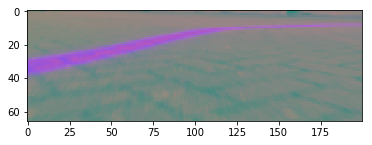

In [36]:
print('X.shape: ', X.shape)
print('Y.shape: ', Y.shape)
imshow(X[0])

In [37]:
test_P = model.predict(X)

In [38]:
test_P = pd.DataFrame(test_P,columns=['predict_steer','predict_thrott'])
thrott = test_P['predict_thrott'].values
steer = test_P['predict_steer'].values
print(thrott.shape)

(728,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD38925940>,
      dtype=object)

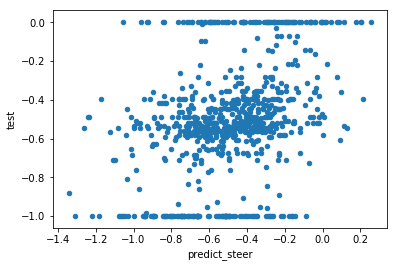

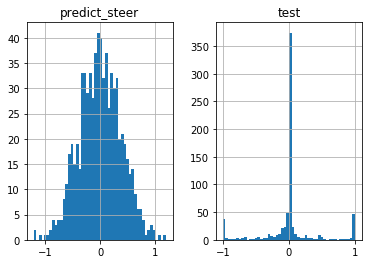

In [42]:
df1 = pd.DataFrame({'predict_steer':thrott, 'test':Thrott})
ax = df1.plot.scatter('predict_steer', 'test')
df1.diff().hist(bins=50)

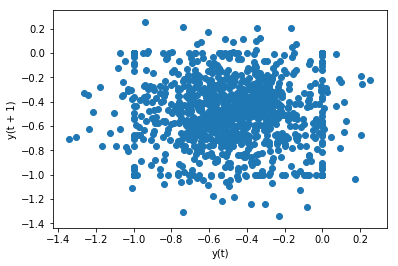

In [44]:
from pandas.plotting import lag_plot
lag_plot(df1)

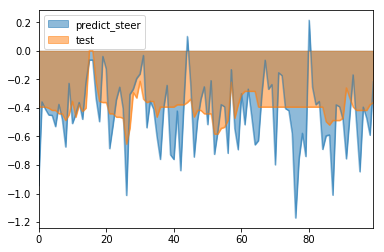

In [45]:
df1[:100].plot.area(stacked=False)

In [ ]:
for fname in filelist:
    image = mpimg.imread(fname)
    

    #__image2 = cv2.cvtColor(__image1, cv2.COLOR_BGR2RGB) 

    __image1 = utils.preprocess(image)
    __image2 = np.asarray(__image1, dtype=np.float32)
    __image = np.array([__image2]) 

    cv2.imshow('image',__image1)
    cv2.waitKey(0)
    cv2.destroyAllWindows          

    __steering_angle = model.predict(__image, batch_size=1)
    steer = __steering_angle[0][0]
    throt = __steering_angle[0][1]
    throt = throt * -1
    if steer < -1:
        steer = -1
    if steer > 1:
        steer = 1
    

    #steer = int(steer * 120)
    print ("Lenken ------------------")
    print(steer)

                

Lenken ------------------
-0.021086464
Lenken ------------------
0.042758387
Lenken ------------------
0.050229248
Lenken ------------------
0.19940536
